#### Data Manipulation and Visualisation

This is the second part of the code which involves:
1) **EDA(Exploratory Data Analysis) and Data Preprocessing**
   -obtaining information on columns in the webscraped dataset
   -converting date columns (like Data flown and date published) into datetype columns
   -ordering the dataset by data published at the index
2) **Data Visualisation**
   - Obtaining visuals based on various metrics
   - Visuals are separately presented with key insights on a presentation slide
   


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import os 
print(os.getcwd())

C:\Users\Krishnan Srinivas\Data


In [18]:
df = pd.read_csv("BA_reviews_on_skytrax.csv")

In [20]:
df.head()

,Title,Author,Date Published,Review Text,Overall Rating,Traveller Type,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value for Money,Recommended
0,"""they still haven't replied""",E Vandoon,2025-02-18,✅Trip Verified| I flew from Amsterdam to Las...,1,Business,Premium Economy,Amsterdam to Las Vegas via London,November 2024,3,0,3,3,1,5,no
1,"""thoroughly enjoyed this flight""",A Hashin,2025-02-14,✅Trip Verified| I have never travelled with ...,9,Solo Leisure,Economy Class,Dubai to London Heathrow,February 2025,4,0,5,4,5,5,yes
2,“customer support was terrible”,L Martin,2025-02-07,"✅Trip Verified| Terrible overall, medium servi...",1,Couple Leisure,Economy Class,Zürich to London,December 2024,2,0,1,1,1,5,no
3,"""a really enjoyable experience""",Paul Lee,2025-02-01,✅Trip Verified| London Heathrow to Male In n...,9,Couple Leisure,Business Class,London to Male,January 2025,5,0,4,5,5,5,yes
4,"""the flight was delayed""",S Herron,2025-01-05,✅Trip Verified| The check in process and rewar...,1,Business,Economy Class,London to Basel,January 2025,1,0,2,1,1,5,no


### Exploratory data analysis and Data Preprocessing

1. Idenfying data types of columns and changing the date columns to datetime datatype
2. Sorting the values by date published

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1879 non-null   object
 1   Author                  1879 non-null   object
 2   Date Published          1879 non-null   object
 3   Review Text             1879 non-null   object
 4   Overall Rating          1879 non-null   int64 
 5   Traveller Type          1877 non-null   object
 6   Seat Type               1878 non-null   object
 7   Route                   1876 non-null   object
 8   Date Flown              1879 non-null   object
 9   Seat Comfort            1879 non-null   int64 
 10  Cabin Staff Service     1879 non-null   int64 
 11  Food & Beverages        1879 non-null   int64 
 12  Inflight Entertainment  1879 non-null   int64 
 13  Ground Service          1879 non-null   int64 
 14  Value for Money         1879 non-null   int64 
 15  Reco

In [40]:
df["Date Published"]= pd.to_datetime(df["Date Published"], format="%Y-%m-%d")
df["Date Flown"] = df["Date Flown"].dt.strftime("%B %Y")


print(df[["Date Flown"]].head())

df.dtypes

      Date Flown
0  November 2024
1  February 2025
2  December 2024
3   January 2025
4   January 2025


Title                             object
Author                            object
Date Published            datetime64[ns]
Review Text                       object
Overall Rating                     int64
Traveller Type                    object
Seat Type                         object
Route                             object
Date Flown                        object
Seat Comfort                       int64
Cabin Staff Service                int64
Food & Beverages                   int64
Inflight Entertainment             int64
Ground Service                     int64
Value for Money                    int64
Recommended                       object
dtype: object

In [42]:
df.head()

,Title,Author,Date Published,Review Text,Overall Rating,Traveller Type,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value for Money,Recommended
0,"""they still haven't replied""",E Vandoon,2025-02-18,✅Trip Verified| I flew from Amsterdam to Las...,1,Business,Premium Economy,Amsterdam to Las Vegas via London,November 2024,3,0,3,3,1,5,no
1,"""thoroughly enjoyed this flight""",A Hashin,2025-02-14,✅Trip Verified| I have never travelled with ...,9,Solo Leisure,Economy Class,Dubai to London Heathrow,February 2025,4,0,5,4,5,5,yes
2,“customer support was terrible”,L Martin,2025-02-07,"✅Trip Verified| Terrible overall, medium servi...",1,Couple Leisure,Economy Class,Zürich to London,December 2024,2,0,1,1,1,5,no
3,"""a really enjoyable experience""",Paul Lee,2025-02-01,✅Trip Verified| London Heathrow to Male In n...,9,Couple Leisure,Business Class,London to Male,January 2025,5,0,4,5,5,5,yes
4,"""the flight was delayed""",S Herron,2025-01-05,✅Trip Verified| The check in process and rewar...,1,Business,Economy Class,London to Basel,January 2025,1,0,2,1,1,5,no


In [44]:
#Sorting the data by date published and setting it as an index
df= df.sort_values (by=["Date Published"], ascending=False)
df.set_index("Date Published", inplace=True)


df.head()

### Data Visualisation

1. Distribution of overall ratings through a bar chart (1-10)
2. Distribution of overall ratings through a pie chart (proportion of reviewers who gave different ratings)
3. Average Overall Rating over time
4. No of people who recommended the airline vs those that did not over time. 
5. Since, numbers was very dependent on various factors, percentage of viewers between those that recommended and those that didn't recommend was plotted by year
6. Correlation matrix bet

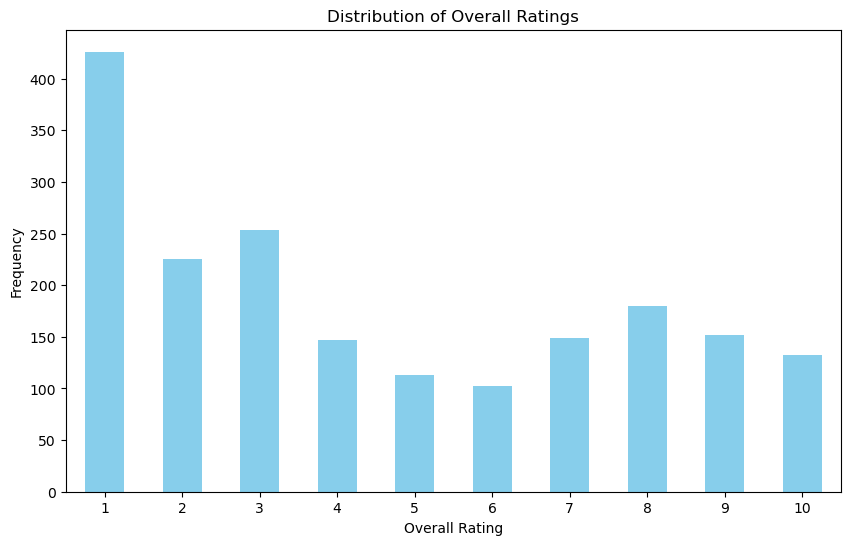

In [52]:
#Distribution of Overall Ratings 
rating_counts = df['Overall Rating'].value_counts().sort_index()
rating_counts = rating_counts.sort_index()

plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

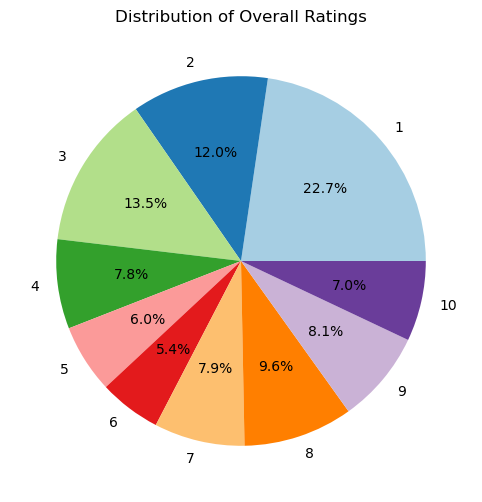

In [56]:
#Pie chart showing share of reviewers
plt.figure(figsize=(10,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Overall Ratings')
plt.show()


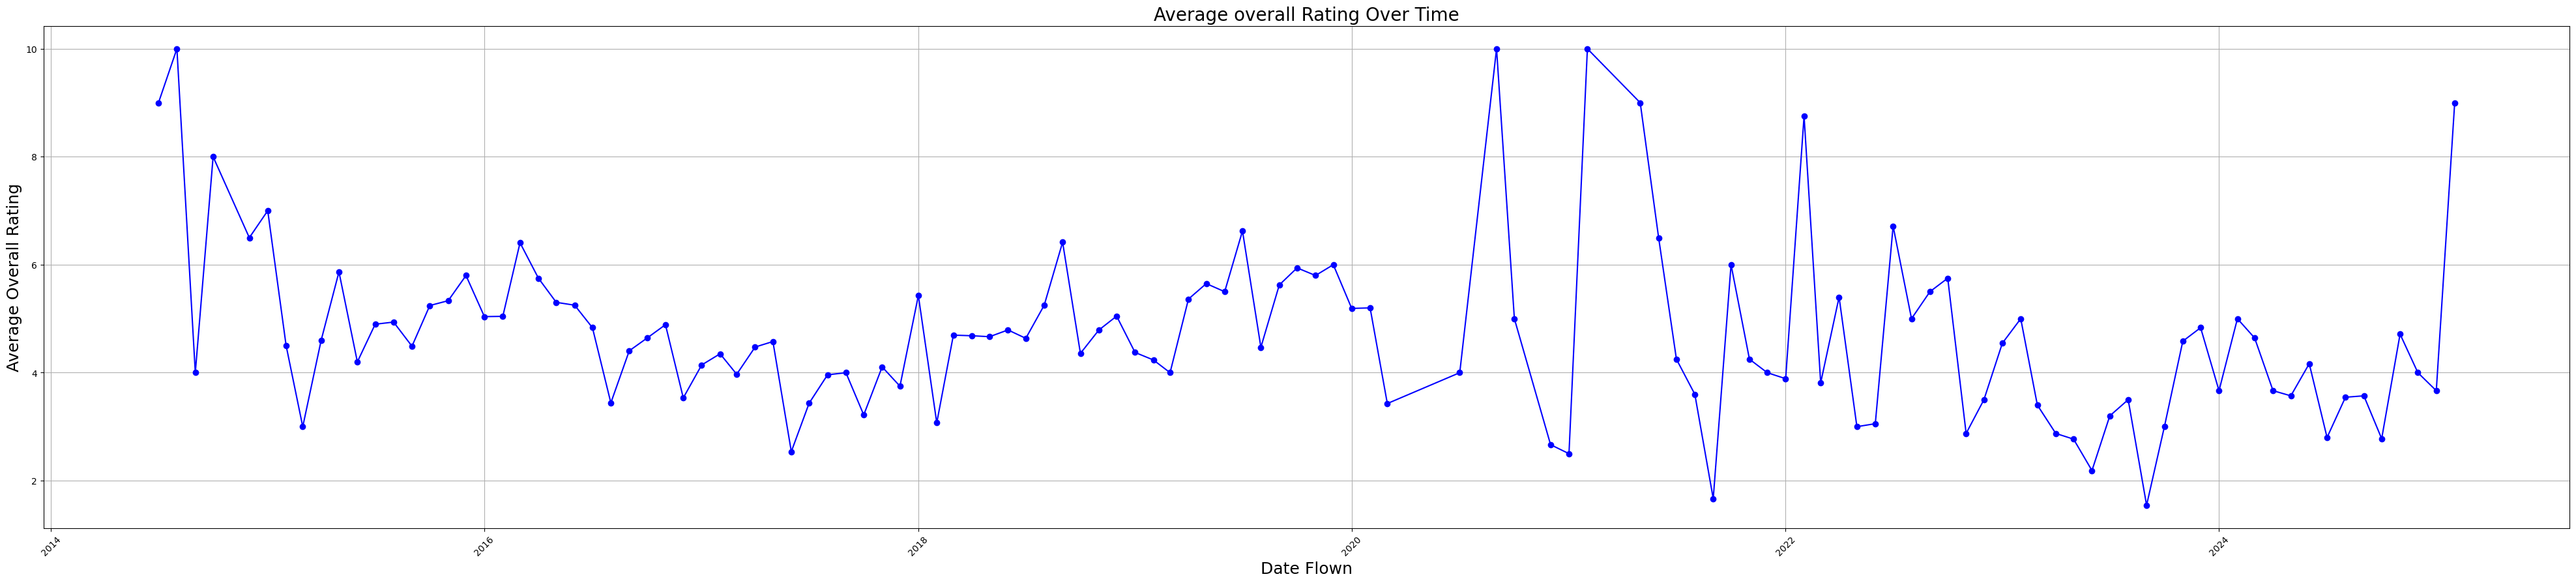

In [86]:
#Time series indicating average rating over time
df["Date Flown"] = pd.to_datetime(df["Date Flown"], format="%B %Y")

average_ratings_by_date = df.groupby('Date Flown')['Overall Rating'].mean()


plt.figure(figsize=(50,10))
plt.plot(average_ratings_by_date.index, average_ratings_by_date.values, marker='o', linestyle='-', color='blue')
plt.title('Average overall Rating Over Time', fontsize=20)
plt.xlabel('Date Flown', fontsize=18)
plt.ylabel('Average Overall Rating', fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

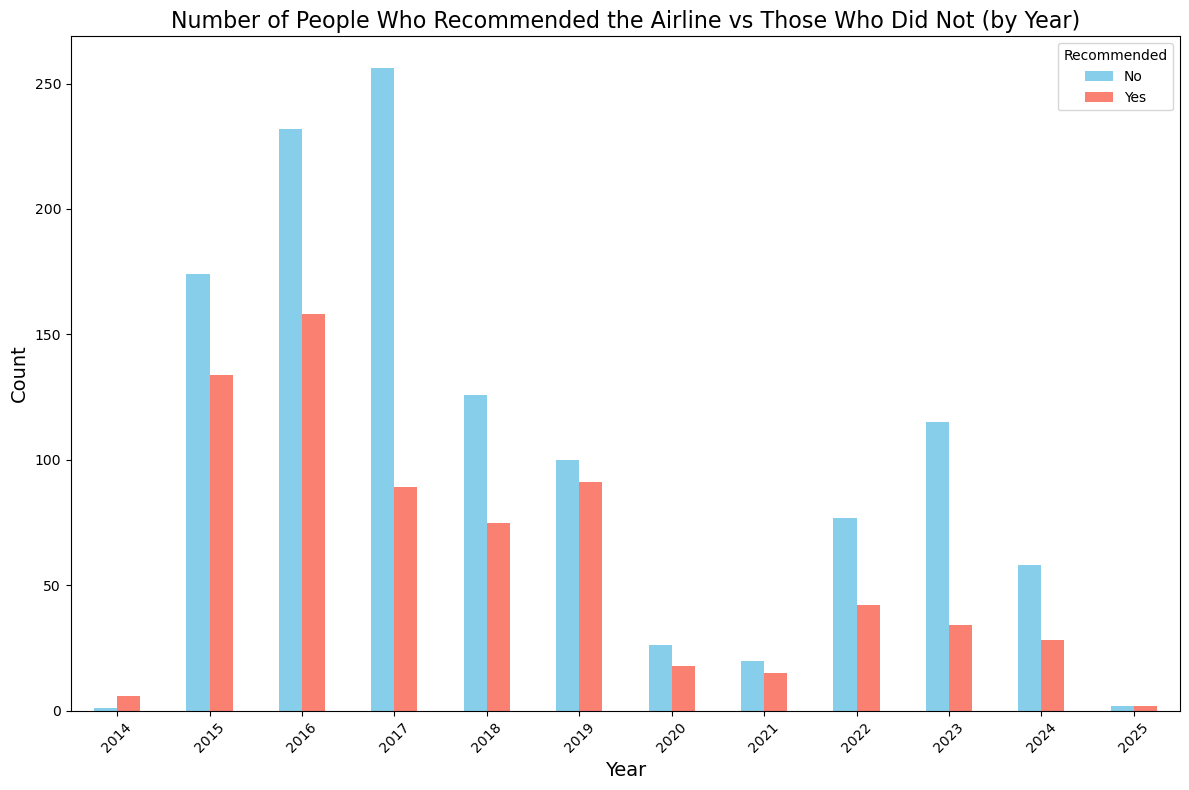

In [90]:

df['Year'] = df['Date Flown'].dt.year
recommendation_counts = df.groupby(['Year','Recommended']).size().unstack()

recommendation_counts.plot(kind='bar', figsize=(12,8), color=['skyblue','salmon'])
plt.title('Number of People Who Recommended the Airline vs Those Who Did Not (by Year)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recommended', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

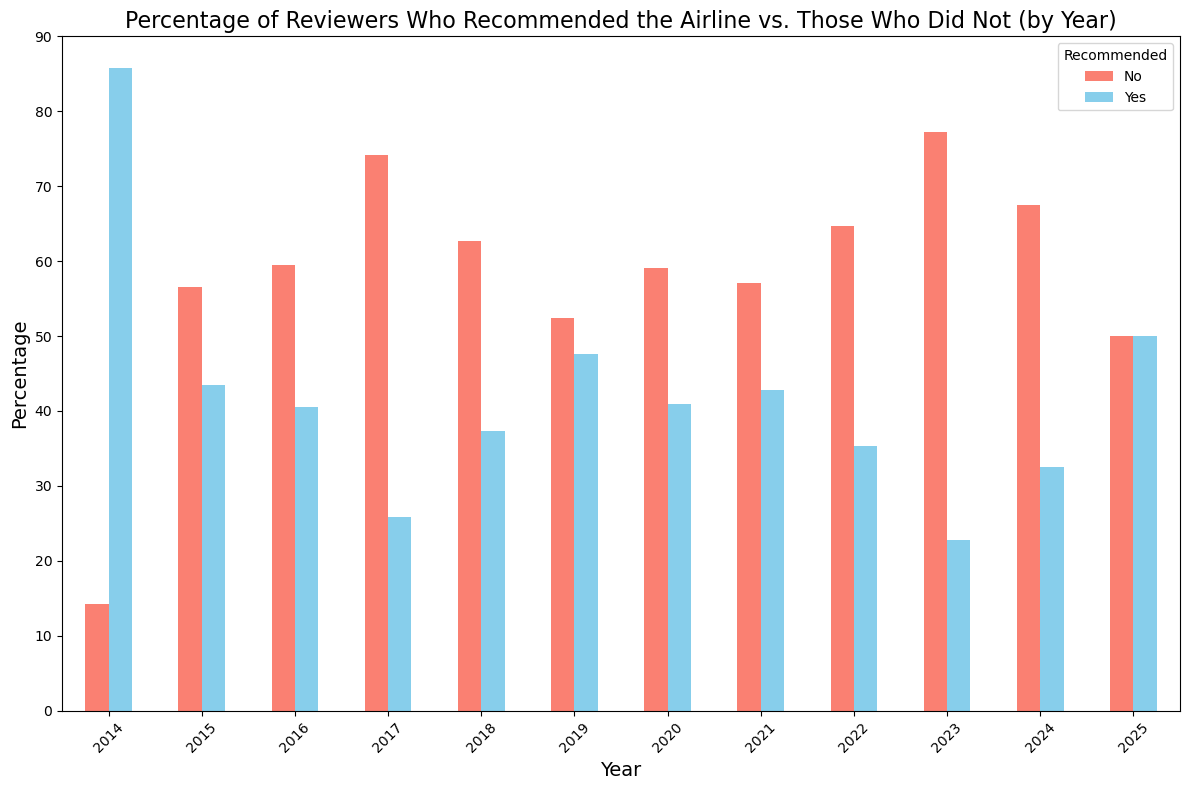

In [100]:
#Plotted percentage of reviewers who did and did not recommend the airline
df['Year'] = df['Date Flown'].dt.year

recommendation_counts = df.groupby(['Year', 'Recommended']).size().unstack()
recommendation_percentage = (recommendation_counts.div(recommendation_counts.sum(axis=1), axis=0)*100).fillna(0)

plt.figure(figsize=(12,8))
recommendation_percentage.plot(kind='bar', stacked=False, figsize=(12,8), color=['salmon','skyblue'])
plt.title('Percentage of Reviewers Who Recommended the Airline vs. Those Who Did Not (by Year)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Recommended', labels=['No','Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

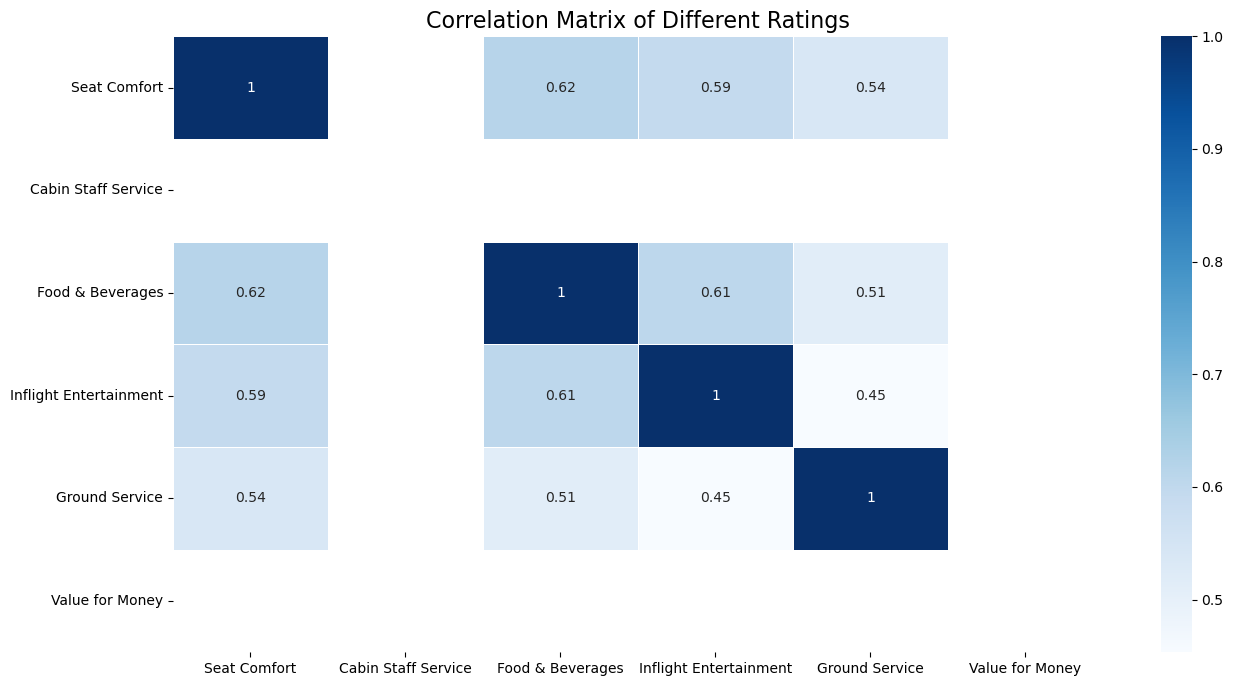

In [108]:
rating_columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value for Money']

correlation_matrix = df[rating_columns].corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix of Different Ratings', fontsize=16)
plt.show()

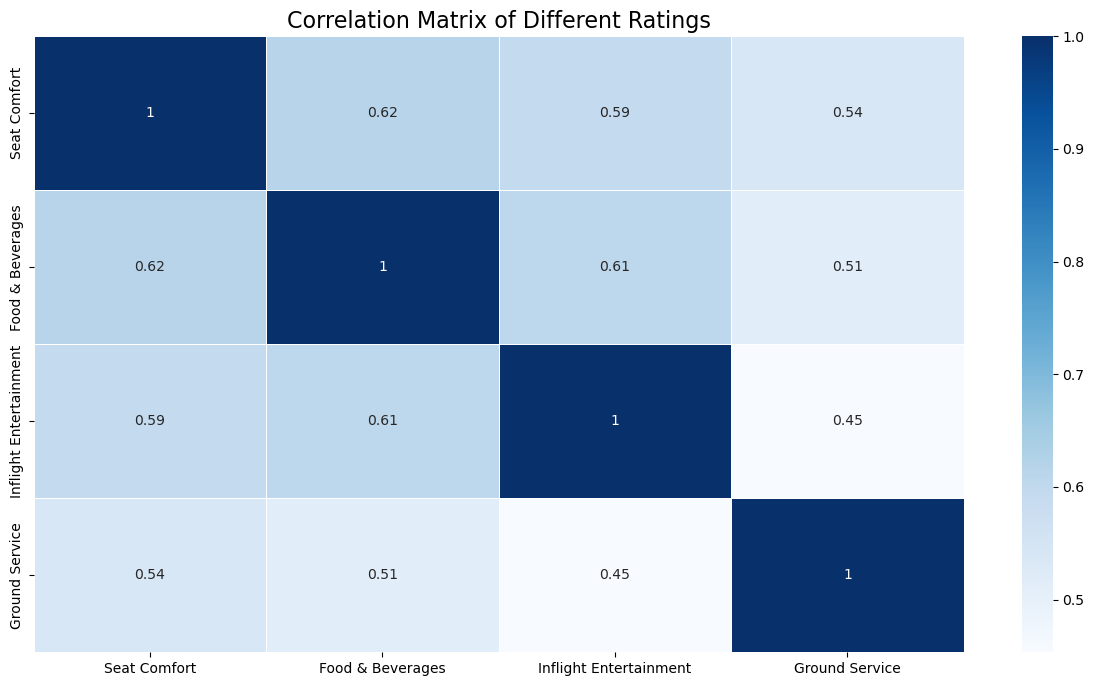

In [112]:
rating_columns = ['Seat Comfort', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service']

correlation_matrix = df[rating_columns].corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix of Different Ratings', fontsize=16)
plt.show()

C:\Users\Krishnan Srinivas\AppData\Local\Temp\ipykernel_25068\117461503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seat Type', y='Overall Rating', data=grouped_data, palette='Blues')


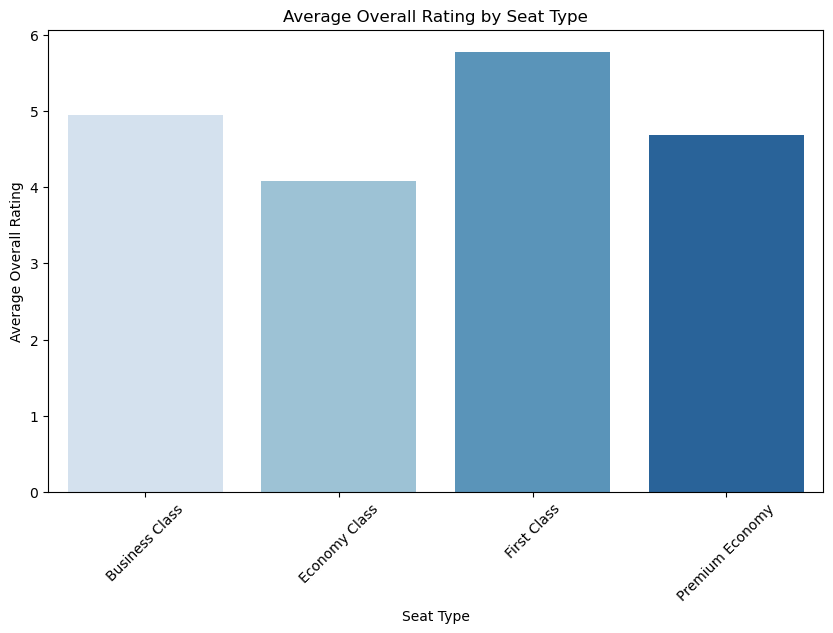

In [122]:
#Average overall rating by seat type

grouped_data = df.groupby('Seat Type')['Overall Rating'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Seat Type', y='Overall Rating', data=grouped_data, palette='Blues')
plt.title('Average Overall Rating by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.show()